<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_3_1_Classification_with_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with logistic regression

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.3.1.1 Motivations

### Examples of classification problems

#### Binary classification: $y$ can only be one of two categories

- Is this email spam? - no or yes, false or true, 0 or 1
- Is the transaction fraudulent? - no or yes, false or true, 0 or 1
- Is the tumor malignant? - no or yes, false or true, 0 or 1

The 0 or false category is often called the **negative class** as opposed to the **positive class**

### How to build a classification algorithm

- How about linear regression?

<img src='https://drive.google.com/uc?export=view&id=19scsIB2Y-AP_6MiPXAmXJ5SIISd0sri0'>

- We could pick a threshold, say $0.5$
 - if $f_{w,b}(x) \lt 0.5 \implies \widehat{y} = 0$
 - if $f_{w,b}(x) \ge 0.5 \implies \widehat{y} = 1$

- What if there is one more training example?
 - This single training example should not change how we classify the data, but it does
 - The vertical dividing line (aka **decision boundary**) still makes sense
 - But the best fit line shifts over (green) and we get a new decision boundary
  - a boundary that no longer makes sense!

<img src='https://drive.google.com/uc?export=view&id=1LF6fxT-fmSmXUb-iSzDVxk8h6KLP4bPu'>


## 1.3.1.2 Lab - Classification

https://colab.research.google.com/drive/1S-s82C5sWGGrAcqVly_IRh0eFclaNTFh

## 1.3.1.3 Logistic Regression

<img src='https://drive.google.com/uc?export=view&id=1PD3WtdeGq6-0lUy_woo6CyfbTDPdtJDJ'>

Logistic Regression will fit a curve that looks like the s-shaped curve in the image above.
**INSERT NOTES HERE**




<img src='https://drive.google.com/uc?export=view&id=1l7hWem5Eni4mXrFqLyiV2fgWrGI1AtJQ'>

**INSERT NOTES HERE**

### The Sigmoid Function

$$
g(z) = \frac{1}{1 + e^{-z}}
$$
<br>
$$
0 \lt g(z) \lt 1
$$

In [7]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0 / (1.0 + np.exp(-z))

    return g

In [8]:
sigmoid(-1_000_000), sigmoid(0), sigmoid(1_000_000)

(7.124576406741285e-218, 0.5, 1.0)

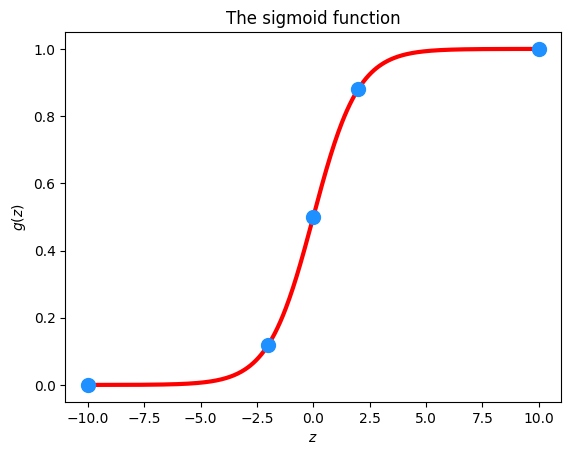

In [6]:
z = np.linspace(-10, 10, 500)
plt.plot(z, sigmoid(z), c='red', lw=3)

zs = np.array([-10, -2, 0, 2, 10])
plt.scatter(zs, sigmoid(zs), c='dodgerblue', s=100, zorder=100)

plt.xlabel('$z$')
plt.ylabel('$g(z)$')
plt.title('The sigmoid function')
plt.show()

In [4]:
sigmoid(499)

1.0

<img src='https://drive.google.com/uc?export=view&id=156WvzHWyqzJ66-tdg8YdjVdPg5T1NQbX'>

**INSERT NOTES HERE**

### Interpretation of Logistic Regression Output

 <img src='https://drive.google.com/uc?export=view&id=1gNJn6dZEKlgq8QZCfOUuQzEiDmkBpIUp'>

**INSERT NOTES HERE**